In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn  as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
data = pd.read_csv('weather.csv')
data.head

<bound method NDFrame.head of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [8]:
#data.shape()

In [9]:
data.size

8052

In [10]:
list(data.columns)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [13]:
data.describe(include='all')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,366.000000,366.000000,366.000000,366.000000,363.000000,363,364.000000,335,365,359.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366,366.000000,366
unique,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NW,NaN,SE,NW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,73,NaN,47,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,NaN,300
mean,7.265574,20.550273,1.428415,4.521858,7.909366,NaN,39.840659,NaN,NaN,9.651811,...,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,NaN,1.428415,NaN
std,6.025800,6.690516,4.225800,2.669383,3.481517,NaN,13.059807,NaN,NaN,7.951929,...,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,NaN,4.225800,NaN
min,-5.300000,7.600000,0.000000,0.200000,0.000000,NaN,13.000000,NaN,NaN,0.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,NaN,0.000000,NaN
25%,2.300000,15.025000,0.000000,2.200000,5.950000,NaN,31.000000,NaN,NaN,6.000000,...,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,NaN,0.000000,NaN
50%,7.450000,19.650000,0.000000,4.200000,8.600000,NaN,39.000000,NaN,NaN,7.000000,...,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,NaN,0.000000,NaN
75%,12.500000,25.500000,0.200000,6.400000,10.500000,NaN,46.000000,NaN,NaN,13.000000,...,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,NaN,0.200000,NaN


In [15]:
#DATA CLEANING

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [17]:
cols = ['WindGustDir','WindDir9am','WindDir3pm','RainTomorrow',]

In [18]:
data=data.drop(cols,axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustSpeed  364 non-null    float64
 6   WindSpeed9am   359 non-null    float64
 7   WindSpeed3pm   366 non-null    int64  
 8   Humidity9am    366 non-null    int64  
 9   Humidity3pm    366 non-null    int64  
 10  Pressure9am    366 non-null    float64
 11  Pressure3pm    366 non-null    float64
 12  Cloud9am       366 non-null    int64  
 13  Cloud3pm       366 non-null    int64  
 14  Temp9am        366 non-null    float64
 15  Temp3pm        366 non-null    float64
 16  RainToday      366 non-null    object 
 17  RISK_MM        366 non-null    float64
dtypes: float64

In [20]:
data.head

<bound method NDFrame.head of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             6.0  

In [22]:
#idata.dropna() for dropping null values

In [23]:
data.dropna()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0


In [24]:
#EXPLORATORY DATA ANALYSIS

In [35]:
idata= data.sort_values(by=['Rainfall'])
jdata = data.sort_values(by=['Sunshine'])

In [27]:
#idata.info()

<AxesSubplot:>

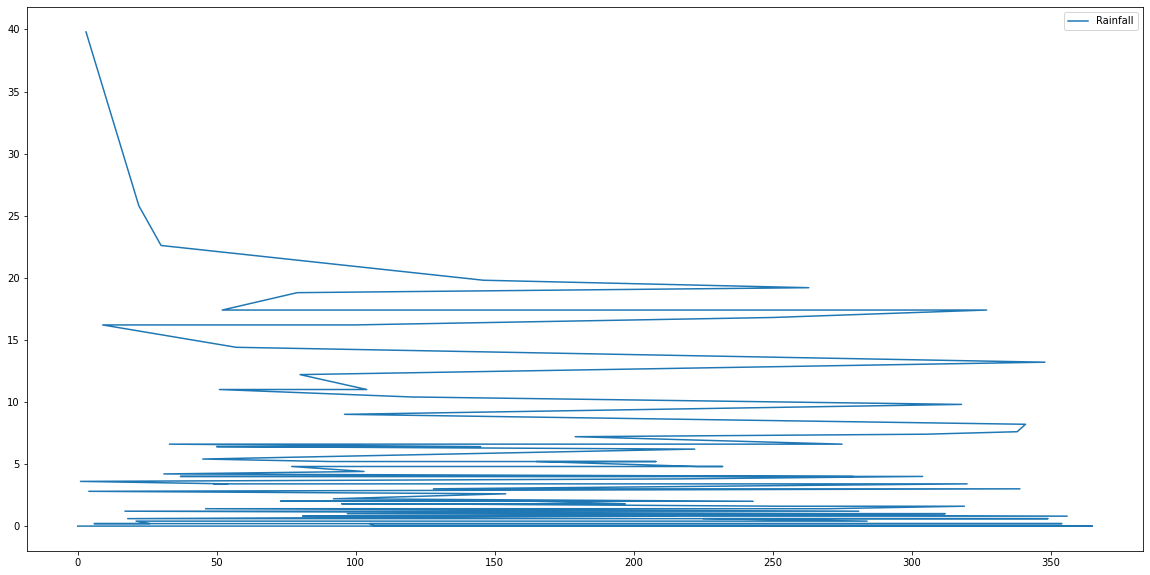

In [29]:
idata.plot(y="Rainfall",figsize=(20,10))

<AxesSubplot:>

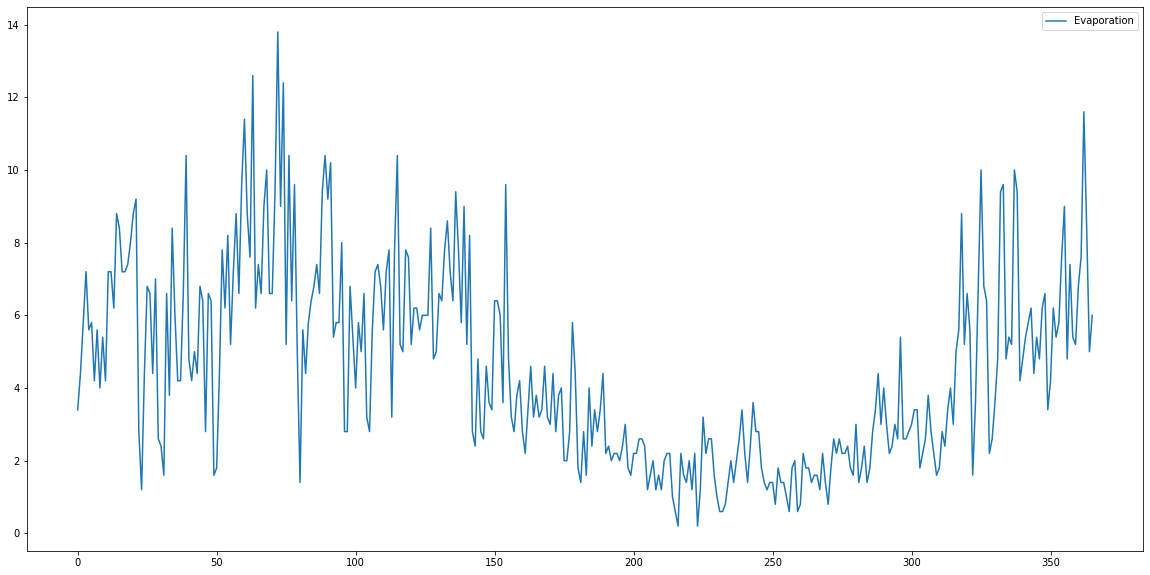

In [34]:
data.plot(y="Evaporation",figsize=(20,10))

<AxesSubplot:>

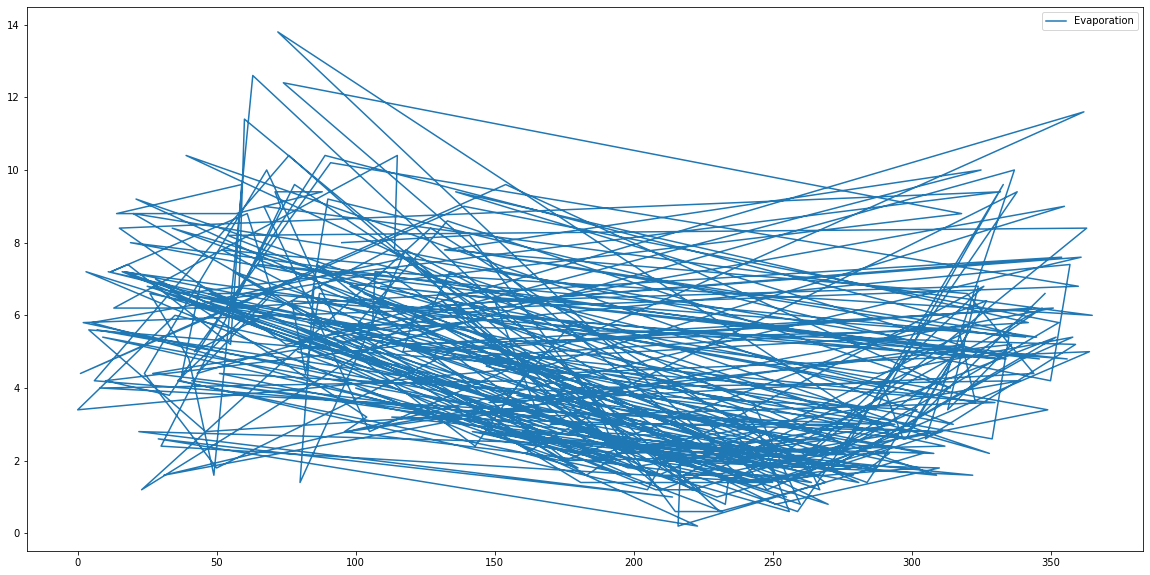

In [39]:
jdata.plot(y="Evaporation",figsize=(20,10))

<AxesSubplot:>

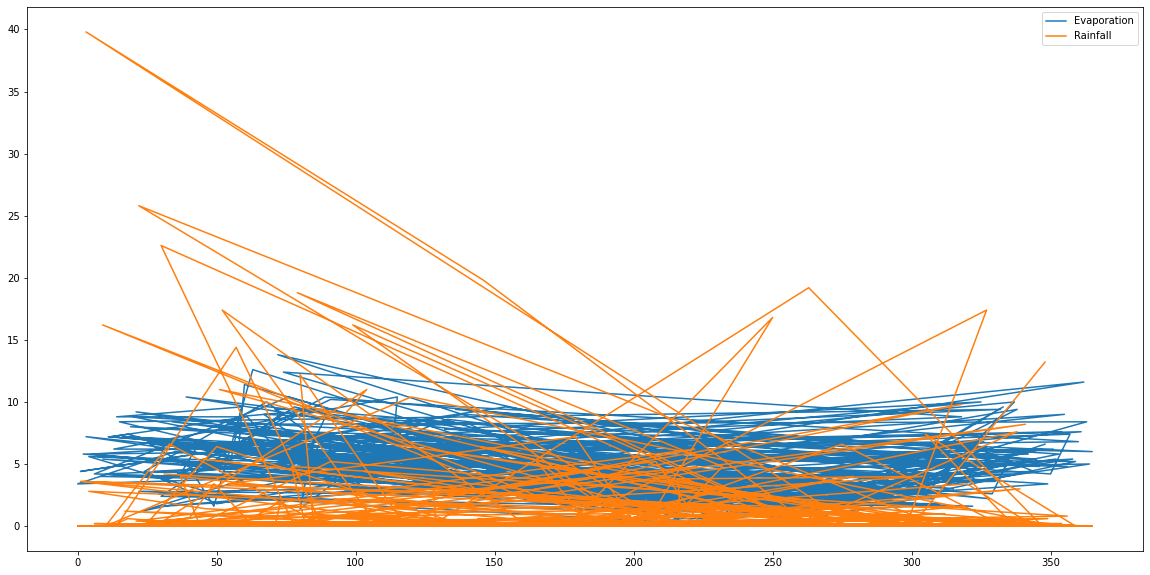

In [40]:
jdata.plot(y=["Evaporation","Rainfall"],figsize=(20,10))

In [41]:
#DATA CORRELATION

In [42]:
#CHECKING CORRELATIONS BETWEEN THE COLS

In [43]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


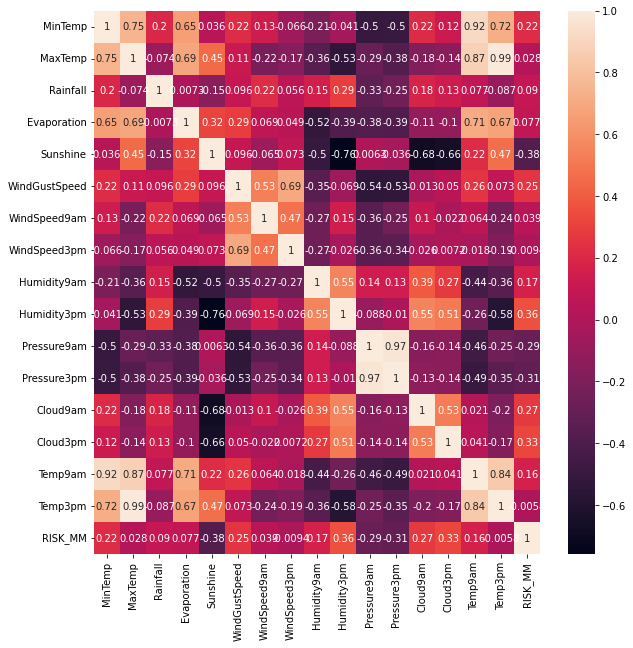

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

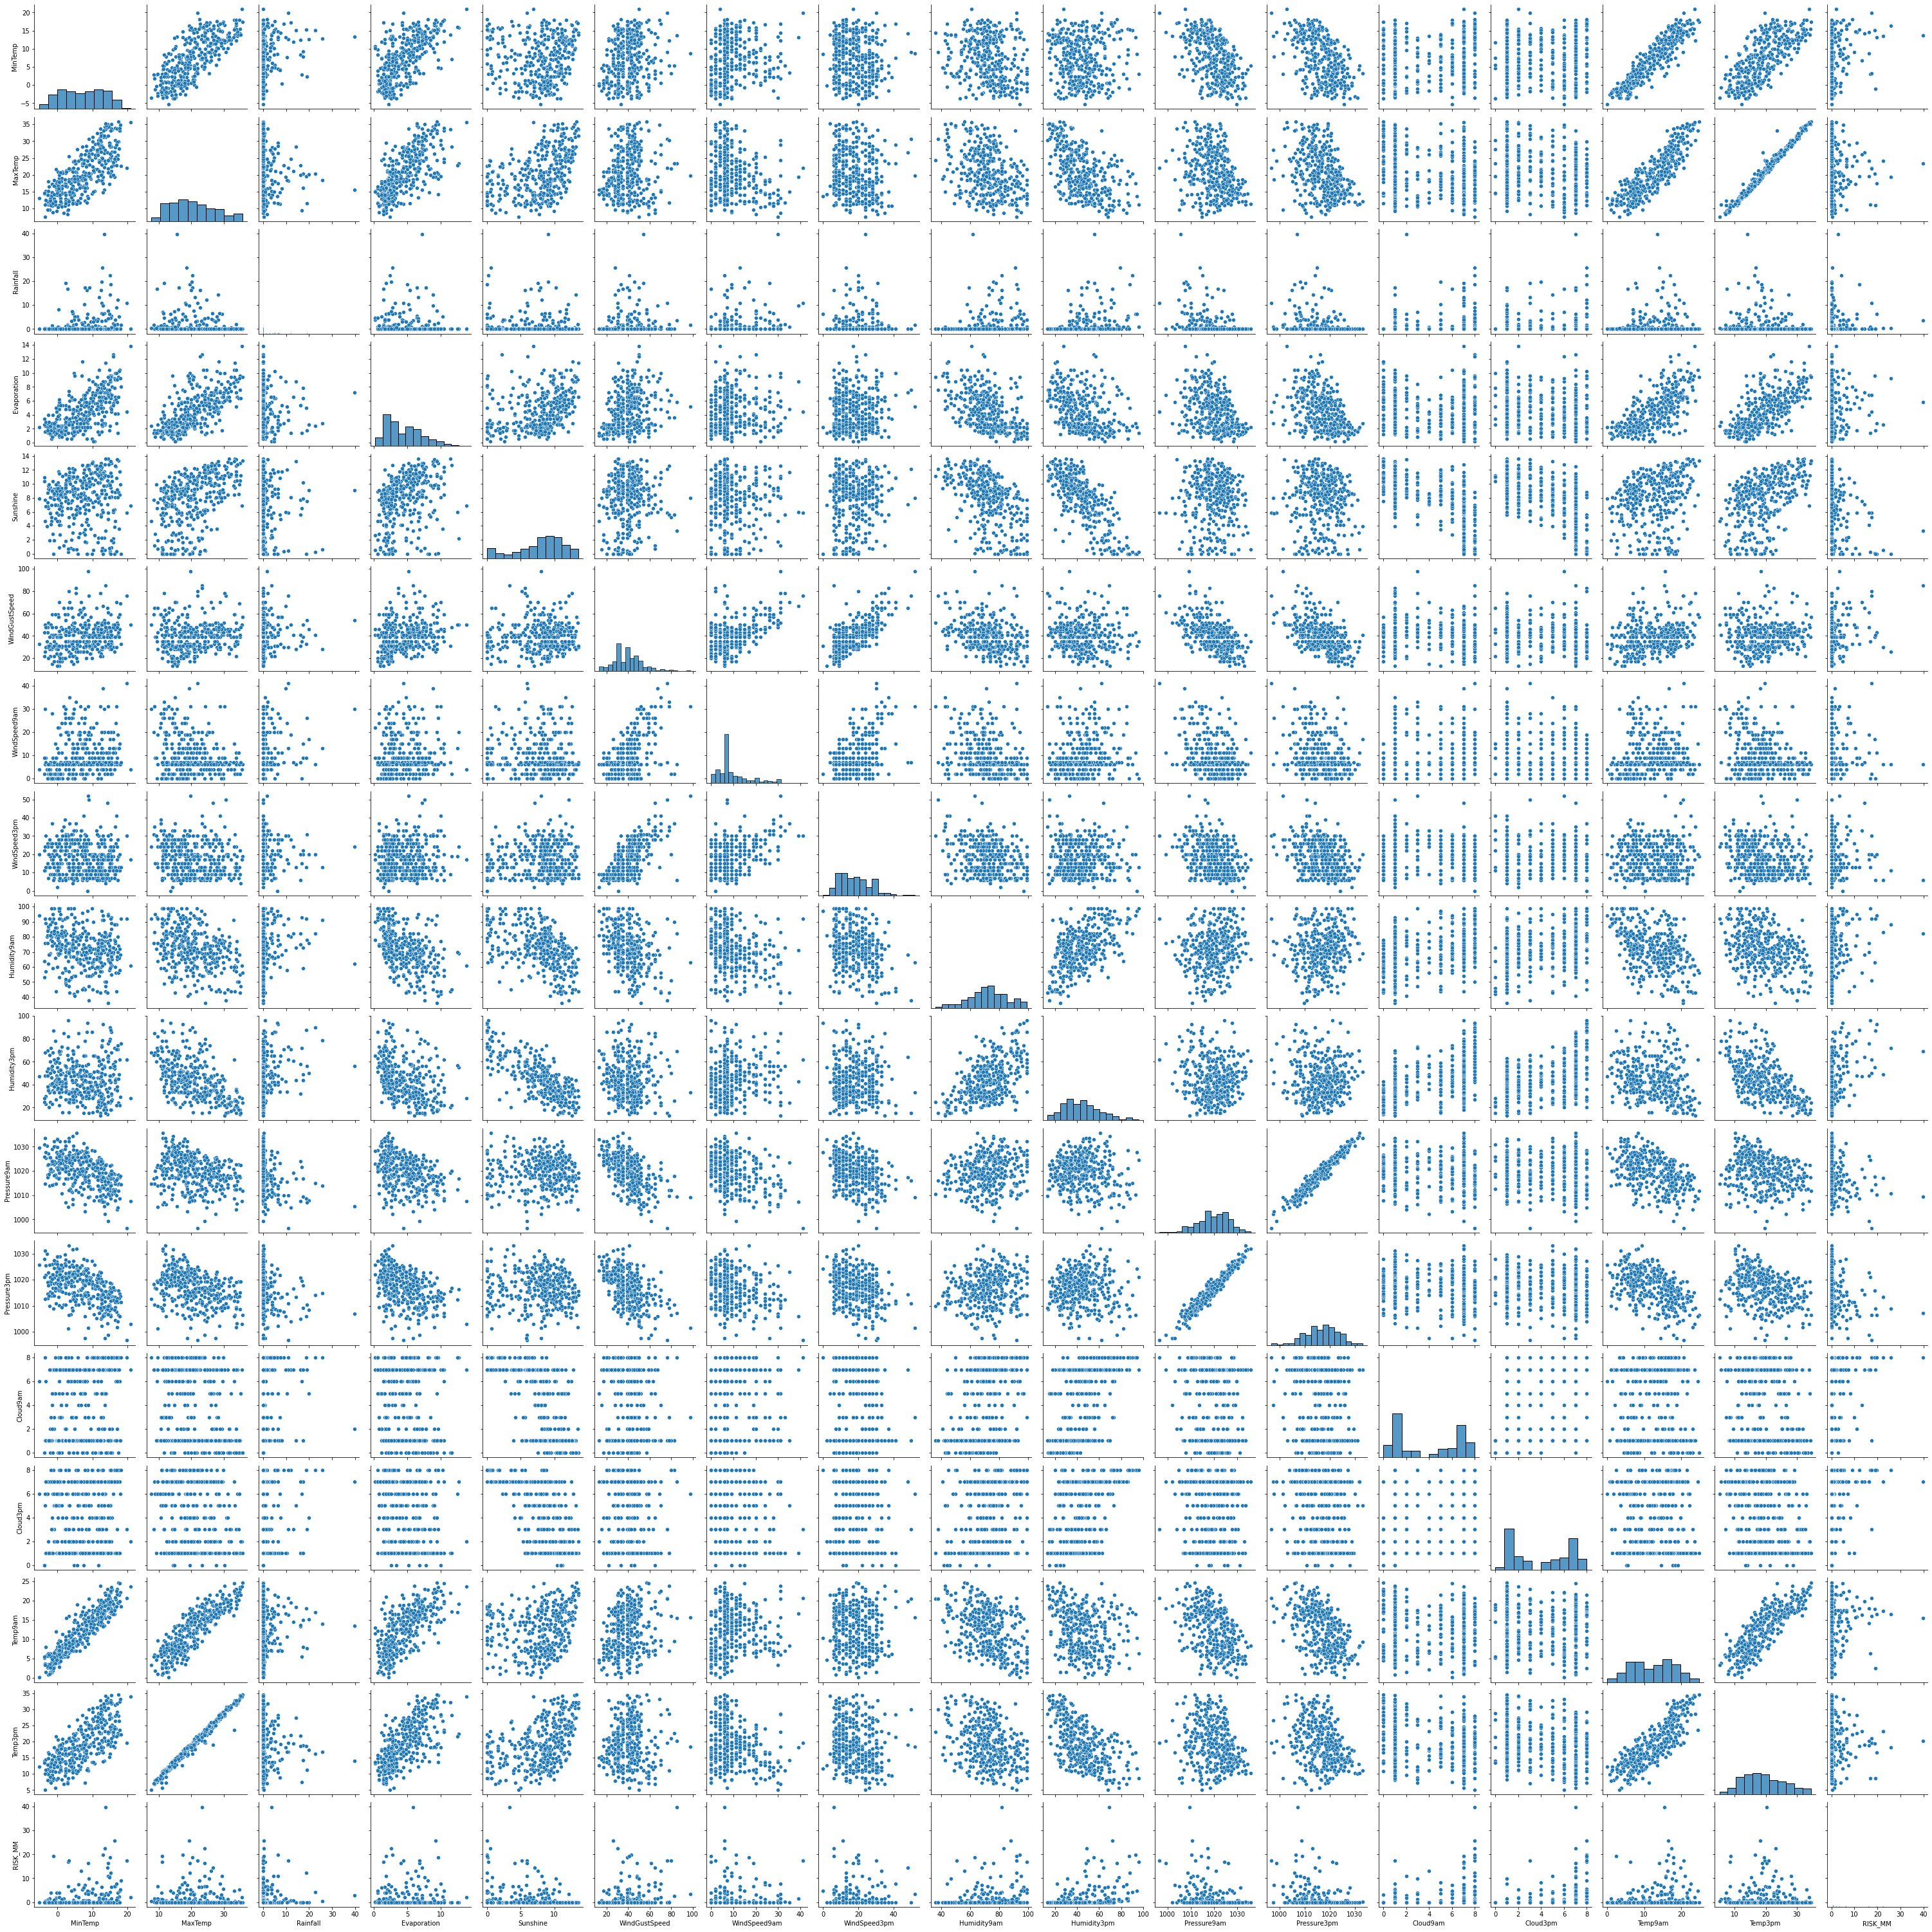

In [45]:
plt.figure(figsize =(20,20))
sns.pairplot(data)
plt.show()

In [46]:
#MODELLING

In [47]:
regr =linear_model.LinearRegression()
regr.fit(X_train,Y_train)

NameError: name 'X_train' is not defined